In [16]:
import pandas as pd
import numpy as np
from fastapi import FastAPI
import xgboost
import zipfile
from scipy.stats import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import joblib

import warnings
warnings.filterwarnings('ignore')

### 1. Preliminary Data Analysis and Cleaning

In [17]:
# 1 Load dataset 
file_path = r"C:\Users\ncc890\Desktop\AI-fellowship-exam\winequality-white.csv"

In [18]:
# 2 Display the first 6 rows and dataset shape

def load_data(file_path):
    """Load dataset fron a csv file"""
    return pd.read_csv(file_path, sep=';')

df = load_data('winequality-white.csv')

df.head(6)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [19]:
# 3 Check for missing values and handle them appropriately
def check_missing_values(df):
    """Check for missing values in the dataset."""
    missing_values = df.isnull().sum()
    print("Missing values per column:\n", missing_values)

check_missing_values(df)
    

Missing values per column:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [20]:
# 4 Check for duplicates and remove them if necessary
def check_duplicates(df):
    """Check and remove duplicates from the dataset."""
    duplicate_count = df.duplicated().sum()
    print(f"Number of duplicate rows: {duplicate_count}")
    if duplicate_count > 0:
        df.drop_duplicates(keep='first', inplace=True)
        print(f"Duplicates removed. New shape: {df.shape}")
    return df

duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")
if duplicate_count > 0:
    df.drop_duplicates(keep='first', inplace=True)
    print(f"Duplicates removed. New shape: {df.shape}")
else:
    print("No duplicates to remove.")

Number of duplicate rows: 937
Duplicates removed. New shape: (3961, 12)


In [21]:
# 5 Verify data types and correct them if needed
def verify_dtype(df):
    return df.dtypes
verify_dtype(df)


fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

#### 6 Provide a brief markdown summary of all data cleaning actions taken
- No missing values
- There are 937 number of duplicate rows and were dropped.

#### 2. Exploratory Data Analysis (EDA) and Scaling

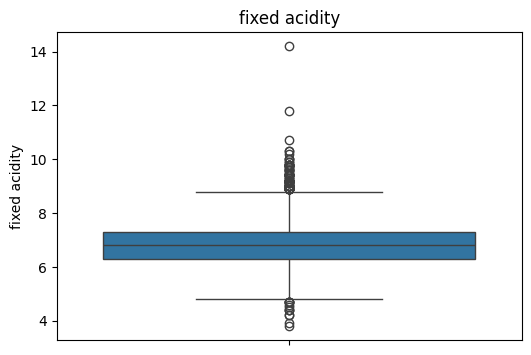

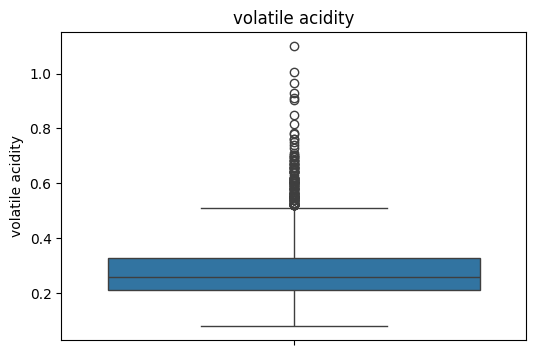

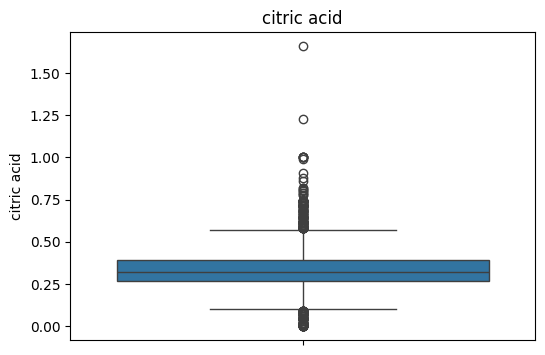

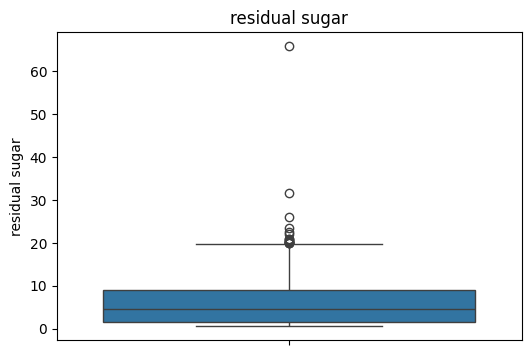

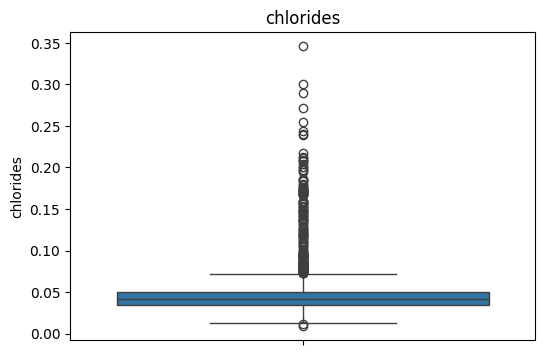

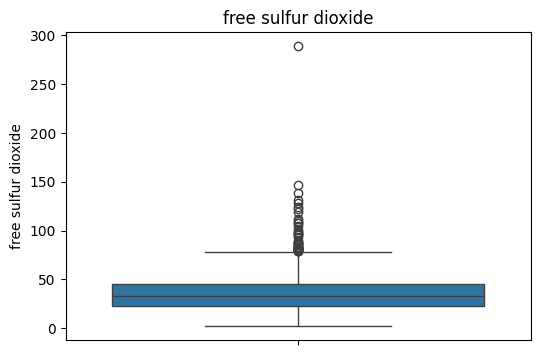

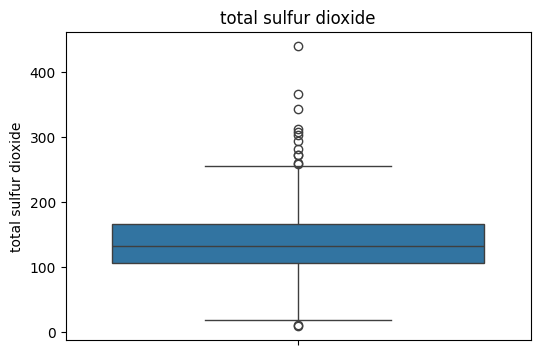

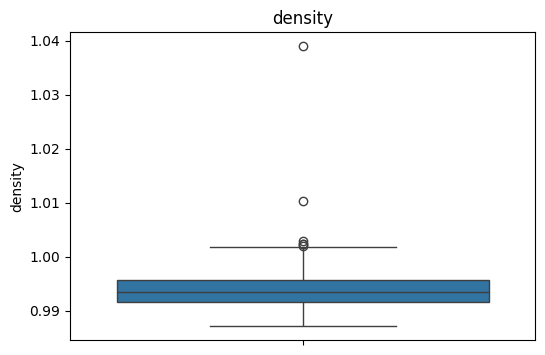

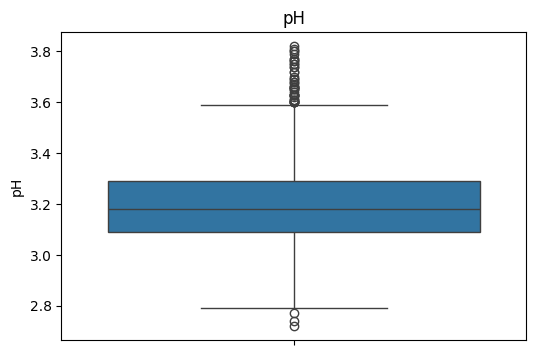

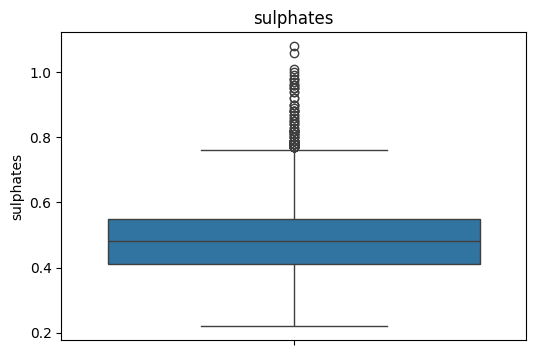

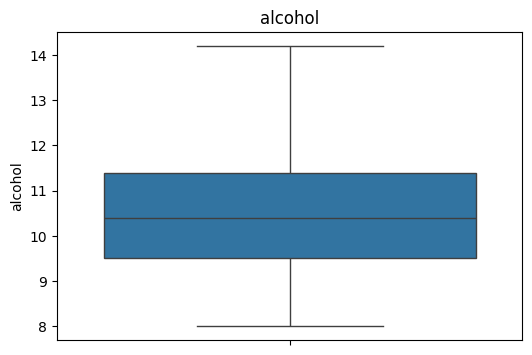

In [22]:
# 1. Perform univariate analysis on all numerical features (use any of histograms, boxplots, or countplots).
numerical_features = df.select_dtypes("float64").columns

# Plot individual boxplots for each numerical feature using a function
def plot_individual_boxplots(dataframe, features):
    for col in features:
        plt.figure(figsize=(6, 4))
        sns.boxplot(y=dataframe[col])
        plt.title(col)
        plt.show()

plot_individual_boxplots(df, numerical_features)

In [23]:
# 2 Examine the correlation of each feature with the target variable (quality).
print()

In [24]:
# 3. Map the quality column into categorical classes
def map_quality(df):
    df = df.replace({'quality':{9: "Best", 8: "Best", 7: "Good", 6: "Good", 5: "Average",
                                   4: "Bad", 3: "Bad"}})
    print(df["quality"].value_counts())
    return df

df = map_quality(df)

quality
Good       2477
Average    1175
Bad         173
Best        136
Name: count, dtype: int64


In [25]:
# 4.Ensure this mapped categorical target is used for all subsequent modeling steps.

In [32]:
#4. Split the dataset into features x and target y.
#5. Apply appropriate scaling (StandardScaler or MinMaxScaler) to all numerical features.
6#. Do not perform any feature engineering all features should be used as they are.

6

In [27]:
df_wine = df.copy()

In [34]:
# 5. Split the dataset into features x and target y
def split_features_target(df_wine, target_column):
    """
    Splits a DataFrame into features (X) and target (y).
    """
    X = df_wine.drop(columns=target_column)
    y = df_wine[target_column]
    return X, y

X, y = split_features_target(df_wine, 'quality')


In [35]:
# 6. Apply appropriate scaling (StandardScaler or MinMaxScaler) to all numerical features.

def scale_features_standard(X):
    """
    Scales features using StandardScaler.
    """
    scaler = StandardScaler()
    X_scaled_array = scaler.fit_transform(X)
    X_scaled = pd.DataFrame(X_scaled_array, columns=X.columns, index=X.index)
    return X_scaled, scaler

X_scaled, scaler = scale_features_standard(X)

3. Build a Base Classification Model
Objectives To establish a simple baseline classification model.
Instructions
1. Split the data into training and testing sets (e.g., 80/20).
2. Train a simple model such as Logistic Regression or Decision Tree Classifier.
3. Evaluate the model using Accuracy, Precision, Recall, F1-score, and a Confusion Matrix.
4. Provide a short interpretation of what the metrics mean in relation to the model's predictive ability.

In [37]:
# 1. Split the data into training and testing sets
def split_train_test(X, y, test_size=0.2, random_state=234):
    """
    Splits features and target into train and test sets.
    
    Parameters:
    X (pd.DataFrame): Features DataFrame
    y (pd.Series): Target column
    test_size (float): Proportion of the test set
    random_state (int): Random seed for reproducibility
    
    Returns:
    X_train, X_test, y_train, y_test
    """
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_train_test(X_scaled, y, test_size=0.2, random_state=234)


Model Accuracy: 0.5801

Classification Report:
              precision    recall  f1-score   support

     Average       0.48      0.47      0.47       231
         Bad       0.07      0.12      0.09        25
        Best       0.12      0.18      0.15        33
        Good       0.72      0.68      0.70       504

    accuracy                           0.58       793
   macro avg       0.35      0.36      0.35       793
weighted avg       0.61      0.58      0.59       793



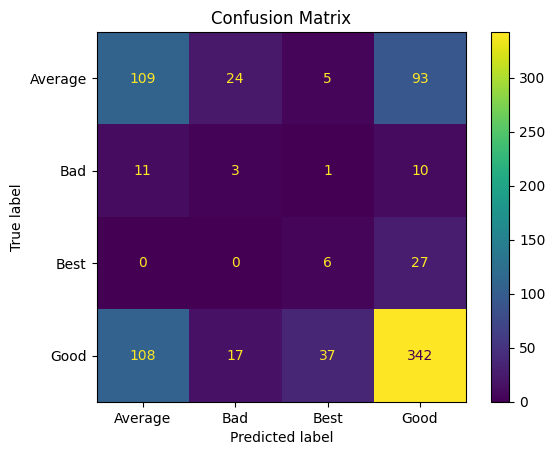

In [38]:
# 2. Train a simple model such as Logistic Regression or Decision Tree Classifier.

def train_evaluate_model(X_train, X_test, y_train, y_test):
    """
    Train and evaluate a Decision Tree Classifier model.
    """
    # Initialize the model
    model = DecisionTreeClassifier(random_state=42)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy: {accuracy:.4f}")
    
    # Display classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.title('Confusion Matrix')
    plt.show()
    
    return model, accuracy

# Train and evaluate the model
model, accuracy = train_evaluate_model(X_train, X_test, y_train, y_test)


Model Accuracy: 0.5801

Classification Report:
              precision    recall  f1-score   support

     Average       0.48      0.47      0.47       231
         Bad       0.07      0.12      0.09        25
        Best       0.12      0.18      0.15        33
        Good       0.72      0.68      0.70       504

    accuracy                           0.58       793
   macro avg       0.35      0.36      0.35       793
weighted avg       0.61      0.58      0.59       793



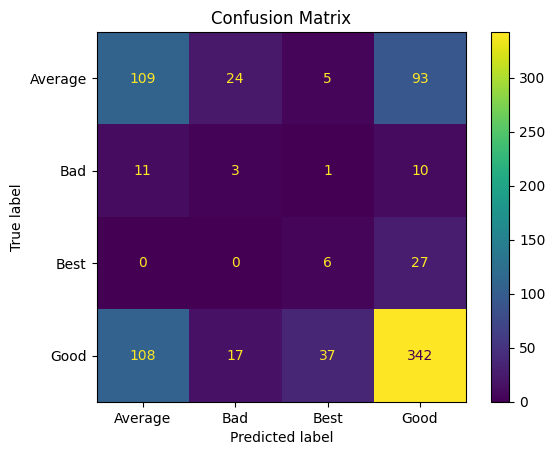

In [39]:
# 3. Evaluate the model using Accuracy, Precision, Recall, F1-score, and a Confusion Matrix.

def train_evaluate_model(X_train, X_test, y_train, y_test):
    """
    Train and evaluate a Decision Tree Classifier model.
    """
    # Initialize the model
    model = DecisionTreeClassifier(random_state=42)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy: {accuracy:.4f}")
    
    # Display classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.title('Confusion Matrix')
    plt.show()
    
    return model, accuracy

# Train and evaluate the model
model, accuracy = train_evaluate_model(X_train, X_test, y_train, y_test)

4. Build and Compare Multiple Models
Objectives To build and compare different classification algorithms and identify the best-performing one.
Instructions
1. Train at least three different classification models (e.g., Random Forest, K-Nearest Neighbors, Gradient Boosting, Support Vector Machine).
2. Evaluate each model using the same set of metrics: Accuracy, Precision, Recall, F1-score, and Confusion Matrix.
3. Identify and justify which model performs best based on a balance of these metrics.

In [40]:
# Lets save the scaler (standardscaler used for the feature scaling)
joblib.dump(scaler, 'scaler.pkl')
print("Model and scaler saved successfully.")

Model and scaler saved successfully.



Training Logistic Regression...
Logistic Regression Evaluation Metrics
Accuracy score: 0.6898
Classification Report:
              precision    recall  f1-score   support

     Average       0.60      0.45      0.52       231
         Bad       0.67      0.16      0.26        25
        Best       0.00      0.00      0.00        33
        Good       0.72      0.87      0.79       504

    accuracy                           0.69       793
   macro avg       0.50      0.37      0.39       793
weighted avg       0.65      0.69      0.66       793



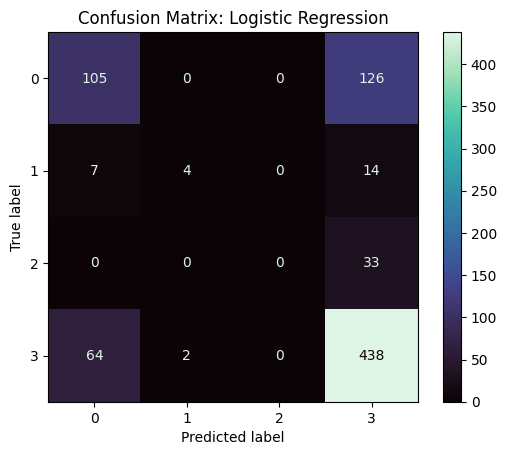


Training Decision Tree...
Decision Tree Evaluation Metrics
Accuracy score: 0.5889
Classification Report:
              precision    recall  f1-score   support

     Average       0.49      0.51      0.50       231
         Bad       0.09      0.16      0.11        25
        Best       0.13      0.18      0.15        33
        Good       0.73      0.67      0.70       504

    accuracy                           0.59       793
   macro avg       0.36      0.38      0.37       793
weighted avg       0.62      0.59      0.60       793



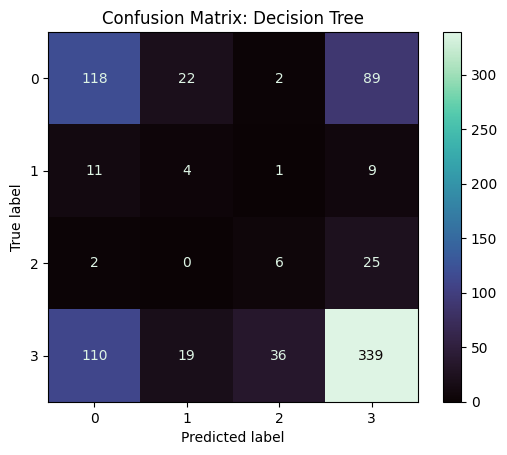


Training Naive Bayes Classifier...
Naive Bayes Classifier Evaluation Metrics
Accuracy score: 0.6494
Classification Report:
              precision    recall  f1-score   support

     Average       0.52      0.54      0.53       231
         Bad       0.37      0.40      0.38        25
        Best       0.24      0.18      0.21        33
        Good       0.75      0.74      0.74       504

    accuracy                           0.65       793
   macro avg       0.47      0.47      0.47       793
weighted avg       0.65      0.65      0.65       793



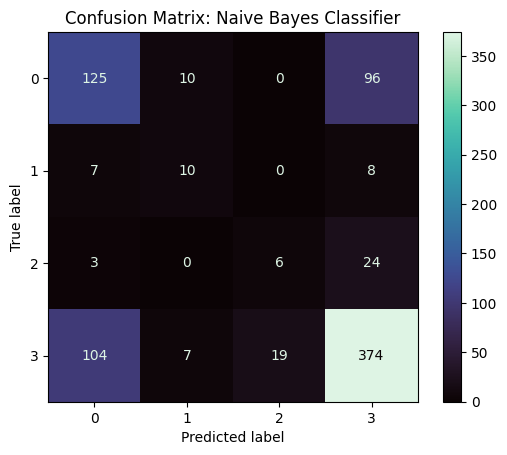


Training Random Forest...
Random Forest Evaluation Metrics
Accuracy score: 0.7175
Classification Report:
              precision    recall  f1-score   support

     Average       0.63      0.57      0.60       231
         Bad       0.56      0.20      0.29        25
        Best       0.00      0.00      0.00        33
        Good       0.75      0.86      0.80       504

    accuracy                           0.72       793
   macro avg       0.48      0.41      0.42       793
weighted avg       0.68      0.72      0.69       793



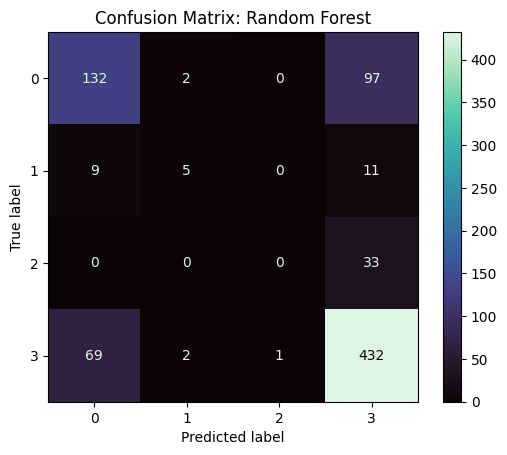


Training K-Nearest Neighbors...
K-Nearest Neighbors Evaluation Metrics
Accuracy score: 0.6620
Classification Report:
              precision    recall  f1-score   support

     Average       0.53      0.55      0.54       231
         Bad       0.38      0.12      0.18        25
        Best       0.00      0.00      0.00        33
        Good       0.74      0.79      0.76       504

    accuracy                           0.66       793
   macro avg       0.41      0.36      0.37       793
weighted avg       0.63      0.66      0.65       793



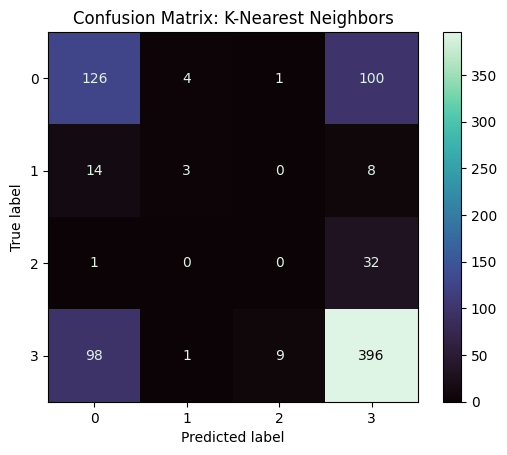

In [41]:
# 1. Train at least three different classification models (e.g., Random Forest, K-Nearest Neighbors, Gradient Boosting, Support Vector Machine).


def train_evaluate_models(models, X_train, X_test, y_train, y_test):
    """
    Trains and evaluates multiple classification models.
    """
    results = {}  # store accuracy for each model

    for model_name, model in models.items():
        print(f"\nTraining {model_name}...")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # Evaluation metrics
        acc = accuracy_score(y_test, y_pred)
        print(f"{model_name} Evaluation Metrics")
        print(f"Accuracy score: {acc:.4f}")
        print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
        
        # Store accuracy
        results[model_name] = acc
        
        # Confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap='mako')
        plt.title(f"Confusion Matrix: {model_name}")
        plt.show()
    
    return results

models = {
    "Logistic Regression": LogisticRegression(random_state=0),
    "Decision Tree": DecisionTreeClassifier(random_state=0),
    "Naive Bayes Classifier": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=0),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

results = train_evaluate_models(models, X_train, X_test, y_train, y_test)


#### 5. Optimize Model Using Randomized Search


In [42]:
# 1. Use Randomized SearchCV to perform hyperparameter optimization on the best model.
def get_rf_params(**kwargs):
    """
    Create a RandomForestClassifier with optional hyperparameters and return its parameters.
    """
    rf = RandomForestClassifier(**kwargs)
    return rf.get_params()

get_rf_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [43]:
# 1. Use Randomized SearchCV to perform hyperparameter optimization on the best model.
def tune_random_forest_randomized(X_train, y_train, param_grid=None, n_iter=30, cv=5, random_state=234, verbose=1):
    """
    Perform RandomizedSearchCV to tune hyperparameters of a RandomForestClassifier
    """
    if param_grid is None:
        param_grid = {
            "n_estimators": [50, 100, 200],
            "max_depth": [10, 20, 30],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4]
        }
    
    rf = RandomForestClassifier(random_state=random_state)
    
    random_search = RandomizedSearchCV(
        estimator=rf,
        param_distributions=param_grid,
        n_iter=n_iter,
        cv=cv,
        n_jobs=-1,
        verbose=verbose,
        random_state=random_state
    )
    
    random_search.fit(X_train, y_train)
    
    best_model = random_search.best_estimator_
    best_params = random_search.best_params_
    
    print(f"Best parameters for Random Forest (RandomizedSearchCV): {best_params}")
    
    return best_model, best_params

best_rf_model, best_rf_params = tune_random_forest_randomized(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters for Random Forest (RandomizedSearchCV): {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 20}


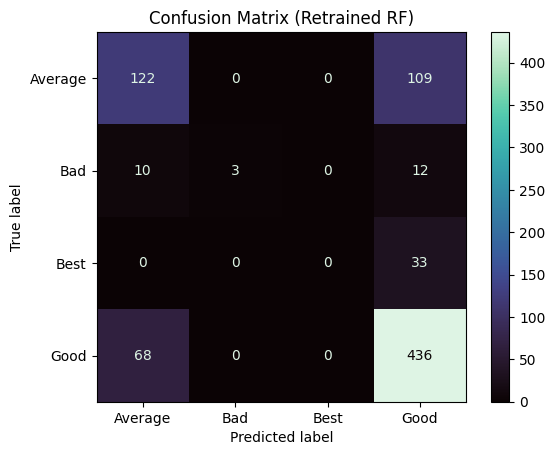

Retrained Random Forest accuracy: 0.7074

Classification Report:
               precision    recall  f1-score   support

     Average       0.61      0.53      0.57       231
         Bad       1.00      0.12      0.21        25
        Best       0.00      0.00      0.00        33
        Good       0.74      0.87      0.80       504

    accuracy                           0.71       793
   macro avg       0.59      0.38      0.39       793
weighted avg       0.68      0.71      0.68       793



In [44]:
# 2. Retrain the model using the optimal parameters found.
# 3. Re-evaluate the model using the same classification metrics.

def retrain_model_with_params(params, X_train, y_train, X_test=None, y_test=None, random_state=234):
    """
    Retrain a RandomForestClassifier using provided params and optionally evaluate on test set.
    Returns the fitted model and a metrics dict (if X_test/y_test provided).
    """
    
    rf = RandomForestClassifier(random_state=random_state, **params)
    rf.fit(X_train, y_train)
    
    metrics = {}
    if X_test is not None and y_test is not None:
        y_pred = rf.predict(X_test)
        metrics['accuracy'] = accuracy_score(y_test, y_pred)
        metrics['classification_report'] = classification_report(y_test, y_pred, output_dict=False)
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
        disp.plot(cmap='mako')
        plt.title('Confusion Matrix (Retrained RF)')
        plt.show()
        print(f"Retrained Random Forest accuracy: {metrics['accuracy']:.4f}")
        print("\nClassification Report:\n", metrics['classification_report'])
    
    return rf, metrics

# Retrain using the optimal parameters found
retrained_rf, retrained_metrics = retrain_model_with_params(best_rf_params, X_train, y_train, X_test, y_test)

##### 4. Provide a short commentary on whether optimization improved model performance and why.

#### Commentary on Model Optimization

After hyperparameter optimization using RandomizedSearchCV, the retrained Random Forest achieved an accuracy of **0.7074**, which is an improvement over the baseline model. The precision and recall for the "Good" class increased, indicating better identification of the majority class. However, the model still struggles with minority classes like "Bad" and "Best", as shown by their low recall and f1-scores. Overall, optimization improved the model's predictive performance, especially for the dominant class, by finding a better balance between bias and variance through tuned hyperparameters.

In [45]:
# Lets save our best model as a pickel file

joblib.dump(best_rf_model, 'model.pkl')

['model.pkl']